# wikipedia article Linear least squares

https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29#Properties_of_the_least-squares_estimators

Overdetermined system:

$$
\sum_{j=1}^n X_{ij}\beta_j = y_i, (i=1,2,\dots,m)
$$

where:

- $n$ is number of parameters
- $m$ is number of data points
- $m > n$

In matrix form:

$$
\mathbf{X}\mathbf{\beta} = \mathbf{y}
$$

This has no solution, so we find the best solution by solving the quadratic minimization problem:

$$
\hat{\mathbf{\beta}} = \mathrm{argmin}_{\beta}S(\mathbf{\beta})
$$

where objective function $S$ is given by:

$$
S(\beta) = \sum_{i=1}^m \lvert y_i-\sum_{j=1}^nX_{ij}\beta_j \rvert^2 = ||\mathbf{y} - \mathbf{X}\mathbf{\beta}||^2
$$

Solution is unique, and is the solution of the normal equations:

$$
(\mathbf{X}^T\mathbf{X})\mathbf{\hat{\beta}} = \mathbf{X}^T \mathbf{y}
$$
&nbsp;

$$
S(\mathbf{\beta}) = ||\mathbf{y} - \mathbf{X}\mathbf{\beta}||^2
$$
&nbsp;

$$
=(\mathbf{y} - \mathbf{X}\mathbf{\beta})^T(\mathbf{y} - \mathbf{X}\mathbf{\beta})
$$
&nbsp;

$$
=\mathbf{y}^T\mathbf{y} - 2\mathbf{\beta}^T\mathbf{X}^T\mathbf{y} + \mathbf{\beta}^T\mathbf{X}^T\mathbf{X}\mathbf{\beta}
$$

Differentiate wrt $\mathbf{\beta}$, and set equal to 0:

$$
= -2\mathbf{X}^T\mathbf{y} + \mathbf{X}^T\mathbf{X}\mathbf{\beta} = 0
$$

#### Inverting the matrix of the normal equations

The algebraic solution of the normal equations can be written as

$$
\mathbf{\hat{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
$$
&nbsp;

$$
=\mathbf{X}^+\mathbf{y}
$$

.... where $\mathbf{X}^+$ is the Moore-Penrose pseudoinverse of $\mathbf{X}$.

Using Cholesky decomposition:

$$
\mathbf{R}^T\mathbf{R}\mathbf{\hat{\beta}} = \mathbf{X}^T\mathbf{y}
$$

First solve for $\mathbf{R}^\mathbf{\hat{\beta}}$

Then solve for $\mathbf{\beta}$

In [1]:
import numpy as np
import scipy.linalg
import math
import time


def run(N=10, K=5, rand_scale=1/1000, rand_translate=1.7):
    # N = 10
    # K = 5

    nr = np.random.mtrand.RandomState(123)
#     X = nr.randn(N, K).astype(np.float32) / 1000 + 10.0
#     X = nr.randn(N, K).astype(np.float32) / 1000 + 1.7
    X = nr.randn(N, K).astype(np.float32) * rand_scale + rand_translate
    # y = nr.choice(2, N).reshape(N, 1)
    y = nr.randn(N, 1)
    print('')
    print('y.shape', y.shape)
    # print('X', X)
    # print('y', y)

    # method 1: use inverse
    # beta = XTy \ XTX
    start = time.time()
    beta = np.linalg.solve(X.T.dot(X), X.T.dot(y))
    t = time.time() - start
    # print('beta', beta)
    r = y - X.dot(beta).reshape(N, 1)
    # print('residuals', r)
    print('sum residuals square, via inverse', np.linalg.norm(r, ord=2), 'time %s' % t)

    start = time.time()
    beta_zeros = np.zeros(X[0].shape)
    t = time.time() - start
    # print('beta_zeros', beta_zeros)
    # print('X.dot beta_zeros', X.dot(beta_zeros).reshape(N, 1))
    r = y - X.dot(beta_zeros).reshape(N, 1)
    # print('residuals', r)
    print('sum residuals square, all zeros', np.linalg.norm(r, ord=2), 'time %s' % t)

    start = time.time()
    Q, R = np.linalg.qr(X)
    # print('Q', Q)
    # print('R', R)
    Rbeta = R.dot(beta)
    # print('Rbeta', Rbeta)
    Qty = Q.T.dot(y)
    # print('Qty', Qty)
    QtyK = Qty[:K]
    # print('QtyK', QtyK)
    # print('RBhat - QTyn', )
    beta_qr = scipy.linalg.solve_triangular(R, QtyK)
    t = time.time() - start
    r = y - X.dot(beta_qr).reshape(N, 1)
    # print('residuals', r)
    print('sum residuals square, via QR', np.linalg.norm(r, ord=2), 'time %s' % t)

    start = time.time()
    XTX = X.T.dot(X)
    R = scipy.linalg.cholesky(XTX)
    XTy = X.T.dot(y)
    Rbeta = scipy.linalg.solve_triangular(R.T, XTy, lower=True)
    beta_chol = scipy.linalg.solve_triangular(R, Rbeta)
    t = time.time() - start
    r = y - X.dot(beta_chol).reshape(N, 1)
    # print('residuals', r)
    print('sum residuals square, via cholesky', np.linalg.norm(r, ord=2), 'time %s' % t)

run(rand_scale=1/1000, rand_translate=1.7)
run(N=1000, K=5, rand_scale=1/1000, rand_translate=1.1)
run(N=1000, K=100, rand_scale=1/100, rand_translate=4.8)
run(N=10000, K=1000, rand_scale=1/10, rand_translate=20)



y.shape (10, 1)
sum residuals square, via inverse 3.17161684324 time 0.011630058288574219
sum residuals square, all zeros 3.85084762269 time 2.3603439331054688e-05
sum residuals square, via QR 3.10045496633 time 0.10797953605651855
sum residuals square, via cholesky 3.18789241 time 0.0034651756286621094

y.shape (1000, 1)
sum residuals square, via inverse 30.9960888594 time 0.00014519691467285156
sum residuals square, all zeros 30.9051117684 time 4.5299530029296875e-06
sum residuals square, via QR 30.6978836503 time 0.00039505958557128906
sum residuals square, via cholesky 31.0702556666 time 0.00027179718017578125

y.shape (1000, 1)
sum residuals square, via inverse 29.8970772323 time 0.00610804557800293
sum residuals square, all zeros 30.8344006822 time 6.198883056640625e-06
sum residuals square, via QR 29.2200476668 time 0.006001710891723633
sum residuals square, via cholesky 31.8596236803 time 0.004059314727783203

y.shape (10000, 1)
sum residuals square, via inverse 94.7944365946 

#### Orthogonal decomposition methods

Write out the residuals:

$$
\mathbf{r} = \mathbf{y} - \mathbf{X}\mathbf{\hat{\beta}}
$$

#### Gramian matrix

A set of vectors is linearly independent if and only if the Gram determinant is non-zero.

The Gram determinant is the square of the volume of the parallelotope formed by the vectors.

#### QR Decomposition

Any real square matrix $\mathbf{A}$ may be decomposed as:
$$
\mathbf{A} = \mathbf{Q} \mathbf{R}
$$

... where:

- $\mathbf{Q}$ is an orthogonal matrix
- $\mathbf{R}$ is an upper-triangular matrix

The factorization is unique if we require that the elements of $\mathbf{R}$ be positive

More generally, for rectangular $\mathbf{A}$:

$$
\mathbf{A} = \mathbf{Q}\mathbf{R}
$$
&nbsp;

$$
= \mathbf{Q}
\begin{bmatrix}
\mathbf{R}_1
\mathbf{0}
\end{bmatrix}
$$
&nbsp;

$$
=
\begin{bmatrix}
\mathbf{Q}_1 &
\mathbf{Q}_2
\end{bmatrix}
\begin{bmatrix}
\mathbf{R}_1 \\
\mathbf{0}
\end{bmatrix}
$$
&nbsp;

$$
=\mathbf{Q}_1 \mathbf{R}_1
$$


Q represents rotations, and/or reflection.  No stretching/shearing/scaling etc.

The first $k$ columns of $mathbf{Q}$ form an orthonormal basis for the span of the first $k$ columns of $\mathbf{A}$.  Any column $k$ of $\mathbf{A}$ depends only on the first $k$ columns of $\mathbf{Q}$, hence the triangular form of $\mathbf{R}$.

Since $\mathbf{Q}$ is orthornormal, so this means that $\mathbf{Q}^T\mathbf{Q} = \mathbf{I}$.

__Computation of QR decomposition__

QR decomposition can be calculated by:

- Gram-Schmidt process: relatively simple.  Quick. Numerically unstable
- Householder reflections: slower.  numerically more stable


In [2]:

import numpy as np
import math

A = np.random.randn(3, 4)
print('A\n', A)

Q, R = np.linalg.qr(A)
print('Q\n', Q)
print('R\n', R)

B = np.random.randn(4, 3)
print('B\n', B)
Q2, R2 = np.linalg.qr(B, 'complete')
print('Q2\n', Q2)
print('R2\n', R2)

print(Q2.dot(R2))

A
 [[ 0.8020184  -0.96804569 -0.30779519  0.4328257 ]
 [ 0.85245695  0.22023317 -0.65260896 -1.38087883]
 [-0.20608982  0.03041821 -0.14135595 -0.37971458]]
Q
 [[-0.67484978  0.73463226  0.0699516 ]
 [-0.71729076 -0.67527383  0.1717534 ]
 [ 0.17341207  0.0657321   0.98265332]]
R
 [[-1.18843989  0.50058908  0.65131306  0.6325522 ]
 [ 0.         -0.85787583  0.20528185  1.22547962]
 [ 0.          0.         -0.27252247 -0.58002157]]
B
 [[ 1.84687893  0.57062657  0.45735341]
 [-0.39986238  1.09655474 -1.97874087]
 [-0.41349776 -0.56895159 -1.08720066]
 [ 0.18363002  0.48554456  0.24484261]]
Q2
 [[-0.9504914  -0.08145174 -0.29940135 -0.01704511]
 [ 0.20578813 -0.8785382  -0.40606039 -0.14469566]
 [ 0.21280554  0.34229686 -0.79455581  0.45412303]
 [-0.09450471 -0.32306208  0.3378681   0.87894534]]
R2
 [[-1.943078   -0.48368    -1.09641297]
 [ 0.         -1.36145513  1.24990249]
 [ 0.          0.          1.61312217]
 [ 0.          0.          0.        ]]
[[ 1.84687893  0.57062657  0.457353

y [-0.16054554  0.05653571  0.04200229 -0.32529482 -0.26025412]


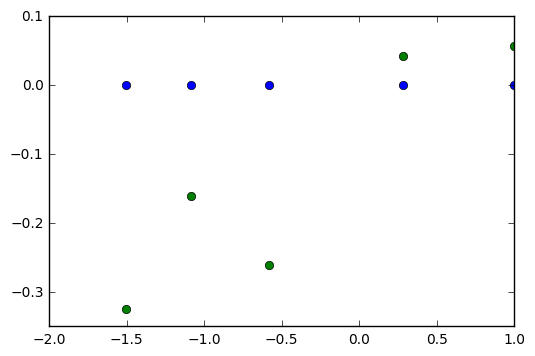

X
 [[-1.08563066]
 [ 0.99734545]
 [ 0.2829785 ]
 [-1.50629473]
 [-0.57860023]]
y
 [-0.16054554  0.05653571  0.04200229 -0.32529482 -0.26025412]


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import math
import importlib
import mylib
importlib.reload(mylib)
from mylib import plot_vector, zerov


N = 5
K = 1

beta_underlying = np.zeros((K,), dtype=np.float32)
beta_underlying.fill(0.3)
noise = 0.1

np.random.seed(123)
X = np.random.randn(N, K).astype(np.float32)
y = X.dot(beta_underlying) + np.random.randn(N) * noise
print('y', y)

plt.plot(X.reshape(N), np.zeros(N), 'o')
plt.plot(X.reshape(N), y, 'o')
plt.show()

print('X\n', X)
print('y\n', y)

beta [ 0.18182514]
X.reshape(N) [-1.08563066  0.99734545  0.2829785  -1.50629473 -0.57860023]
y [-0.16054554  0.05653571  0.04200229 -0.32529482 -0.26025412]
X.dot(beta) [-0.19739495  0.18134248  0.05145261 -0.27388225 -0.10520407]
r [ 0.0368494  -0.12480677 -0.00945031 -0.05141257 -0.15505005]


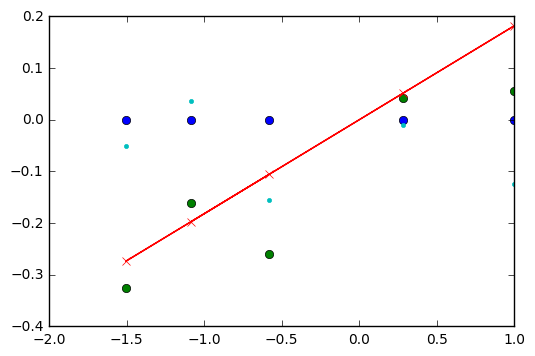

In [4]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print('beta', beta)
plt.plot(X.reshape(N), np.zeros(N), 'o')
plt.plot(X.reshape(N), y, 'o')
plt.plot(X.reshape(N), X.dot(beta), 'x-')
r = y - X.dot(beta)
print('X.reshape(N)', X.reshape(N))
print('y', y)
print('X.dot(beta)', X.dot(beta))
print('r', r)
plt.plot(X.reshape(N), r, '.')
plt.show()


Try projecting vectors onto $(e_1, e_2)$:

X [[-1.08563066]
 [ 0.99734545]
 [ 0.2829785 ]
 [-1.50629473]
 [-0.57860023]]


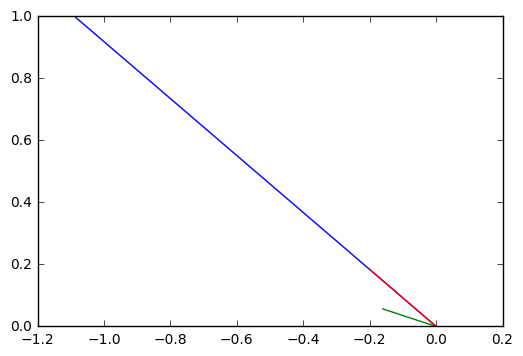

In [33]:
import mylib
import importlib
importlib.reload(mylib)

print('X', X)
mylib.plot_vector(X.reshape(N)[:2])
mylib.plot_vector(y.reshape(N)[:2])
mylib.plot_vector(X.dot(beta).reshape(N)[:2])
plt.show()

Try projecting onto hyperplane, $\mathbf{H}$ containing $\mathbf{X}_{*,1}$ and $\mathbf{y}$.

So, we want a projection $\mathbf{S}$, such that:

- any vector orthogonal to $\mathbf{H}$ hyperplane is also orthogonal to $\mathbf{X}_{*,1}$ and $\mathbf{y}$
- the projection of $\mathbf{X}_{*,1}$ and $\mathbf{y}$, ie $\mathbf{S}\mathbf{X}_{*,1}$ and $\mathbf{S}\mathbf{y}$ is orthogonal to any vector orthogonal to $\mathbf{H}$ hyperplane
- $\mathbf{S}\mathbf{X}_{*,1} \otimes \mathbf{S}\mathbf{y}$ should be orthogonal to $\mathbf{H}$
- $\mathbf{S}\mathbf{X}_{*,1} - \mathbf{X}$ should be orthogonal to $\mathbf{H}$
- $\mathbf{S}\mathbf{X}_{*,1} - \mathbf{X}$ should be orthogonal to $\mathbf{S}\mathbf{y}$
- vector orthogonal to $\mathbf{H}$ is $\mathbf{X}_{*,1} \otimes \mathbf{y}$

... but actually, what we want is an orthonormal basis for the hyperplane.  One vector will be:

$$
\mathbf{b}_1  = \frac{\mathbf{X}_{*,1}}{\lvert\mathbf{X}_{*,1}\rvert}
$$

The other vector will be:

$$
\lvert \mathbf{b}_2\rvert \mathbf{b}_2 = \mathbf{y} - \frac{\mathbf{y}^T \mathbf{X}_{*,1}}{\mathbf{X}_{*,1}^T \mathbf{X}_{*,1}}\mathbf{X}_{*,1}
$$

$$

$$


b0 [-0.49260056  0.4525415   0.12840036 -0.6834752  -0.26253754]
norm b0 1.0
y_proj_x0 [-0.19739494  0.18134247  0.0514526  -0.27388224 -0.10520406]
norm y_proj_x0 0.40072
norm b1_unnorm 0.209063834915
b1 [ 0.17625906 -0.59697918 -0.045203   -0.24591808 -0.7416398 ]
x0.dot(b1) -1.27457262022e-07
norm x0 2.20388
2.20388
norm y 0.451978179775
0.451978179775
norm b1 1.0
b0.dot(b1) -5.46022181913e-08
beta [ 0.18182514]
y_proj_basis[0] / X_proj_basis[0] 0.181825


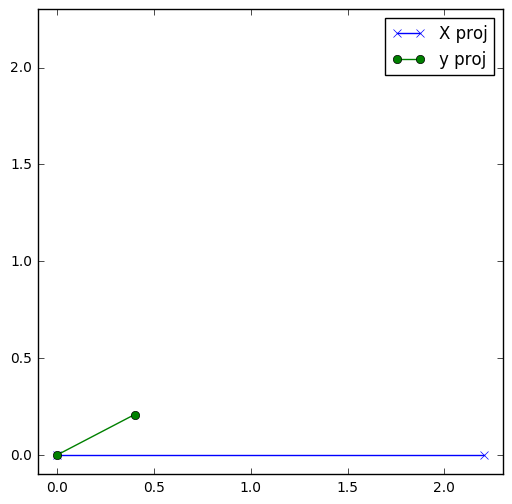

In [31]:
import mylib
import importlib
importlib.reload(mylib)

x0 = X[:, 0]
b0 = x0 / np.linalg.norm(x0)
print('b0', b0)
print('norm b0', np.linalg.norm(b0))

y_proj_x0 = y.dot(x0) / x0.dot(x0) * x0
print('y_proj_x0', y_proj_x0)
print('norm y_proj_x0', np.linalg.norm(y_proj_x0))
b1_unnorm = y - y_proj_x0
print('norm b1_unnorm', np.linalg.norm(b1_unnorm))
b1 = b1_unnorm / np.linalg.norm(b1_unnorm)
print('b1', b1)

print('x0.dot(b1)', x0.dot(b1))

print('norm x0', np.linalg.norm(x0))
print(np.sqrt(np.sum(np.power(x0, 2))))
print('norm y', np.linalg.norm(y))
print(np.sqrt(np.sum(np.power(y, 2))))
print('norm b1', np.linalg.norm(b1))
print('b0.dot(b1)', b0.dot(b1))

def proj_ortho_basis(v, b0, b1):
    v = v.reshape(-1)
    b0 = b0.reshape(-1)
    b1 = b1.reshape(-1)
    x = v.dot(b0)
    y = v.dot(b1)
    proj = np.array([x, y], dtype=np.float32)
    return proj

X_proj_basis = proj_ortho_basis(X, b0, b1)
y_proj_basis = proj_ortho_basis(y, b0, b1)
print('beta', beta)
print('y_proj_basis[0] / X_proj_basis[0]', y_proj_basis[0] / X_proj_basis[0])

plt.figure(figsize=(6, 6))
mylib.plot_vector(X_proj_basis, formatstr='-x', label='X proj')
mylib.plot_vector(y_proj_basis, formatstr='-o', label='y proj')
plt.xlim(-0.1, 2.3)
plt.ylim(-0.1, 2.3)
plt.legend()
plt.show()


What if we project from $\mathbf{X}$ onto $\mathbf{y}$?

b0 [-0.3552064   0.12508504  0.09292991 -0.71971354 -0.57581125]
norm b0 1.0
x0_proj_y [-0.69405141  0.24440846  0.18157932 -1.40627589 -1.12509969]
norm x0_proj_y 1.95393835555
norm b1_unnorm 1.0194094504
b1 [-0.38412361  0.73860114  0.09946856 -0.09811449  0.53609417]
y.dot(b1) 1.11022302463e-16
norm x0 2.20388
2.20388
norm y 0.451978179775
0.451978179775
norm b1 1.0
b0.dot(b1) 2.22044604925e-16
y_proj_basis[0] / X_proj_basis[0] 0.231316


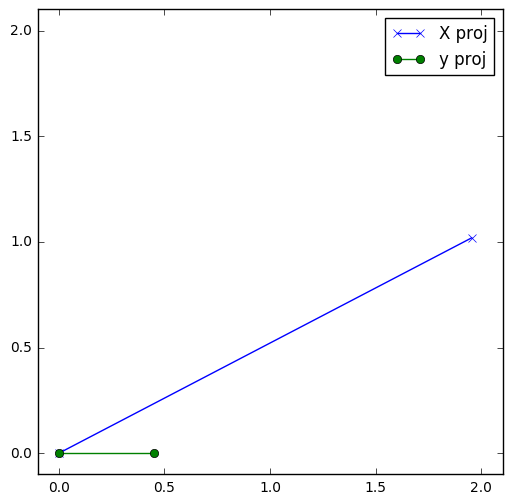

In [28]:
"""
This uses y/mod(y) as b_0, and projects from X onto y
"""

import mylib
import importlib
importlib.reload(mylib)

x0 = X[:, 0]

b0 = y / np.linalg.norm(y)
print('b0', b0)
print('norm b0', np.linalg.norm(b0))

x0_proj_y = x0.dot(y) / y.dot(y) * y
print('x0_proj_y', x0_proj_y)
print('norm x0_proj_y', np.linalg.norm(x0_proj_y))
b1_unnorm = x0 - x0_proj_y
print('norm b1_unnorm', np.linalg.norm(b1_unnorm))
b1 = b1_unnorm / np.linalg.norm(b1_unnorm)
print('b1', b1)

print('y.dot(b1)', y.dot(b1))

print('norm x0', np.linalg.norm(x0))
print(np.sqrt(np.sum(np.power(x0, 2))))
print('norm y', np.linalg.norm(y))
print(np.sqrt(np.sum(np.power(y, 2))))
print('norm b1', np.linalg.norm(b1))
print('b0.dot(b1)', b0.dot(b1))

def proj_ortho_basis(v, b0, b1):
    v = v.reshape(-1)
    b0 = b0.reshape(-1)
    b1 = b1.reshape(-1)
    x = v.dot(b0)
    y = v.dot(b1)
    proj = np.array([x, y], dtype=np.float32)
    return proj

X_proj_basis = proj_ortho_basis(X, b0, b1)
y_proj_basis = proj_ortho_basis(y, b0, b1)
# print('beta', beta)
beta_rev = np.array([y_proj_basis[0] / X_proj_basis[0]], dtype=np.float32)
print('y_proj_basis[0] / X_proj_basis[0]', y_proj_basis[0] / X_proj_basis[0])

plt.figure(figsize=(6, 6))
mylib.plot_vector(X_proj_basis, formatstr='-x', label='X proj')
mylib.plot_vector(y_proj_basis, formatstr='-o', label='y proj')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 2.1)
plt.legend()
plt.show()


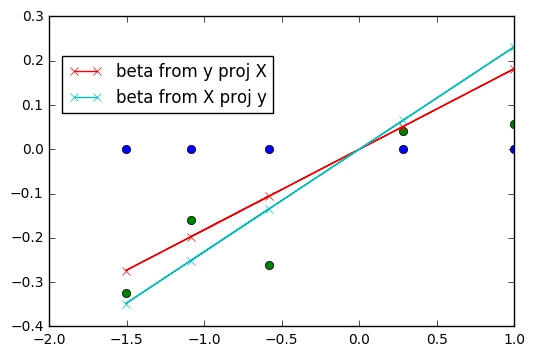

In [32]:
plt.plot(X.reshape(N), np.zeros(N), 'o')
plt.plot(X.reshape(N), y, 'o')
plt.plot(X.reshape(N), X.dot(beta), 'x-', label='beta from y proj X')
plt.plot(X.reshape(N), X.dot(beta_rev), 'x-', label='beta from X proj y')
plt.legend(bbox_to_anchor=(0.5, 0.9))
plt.show()


In [18]:
loss = np.linalg.norm(y - X.dot(beta))
loss_rev = np.linalg.norm(y - X.dot(beta_rev))
print('beta', beta, 'loss', loss)
print('beta_rev', beta_rev, 'loss_rev', loss_rev)

beta [ 0.18182514] loss 0.209063833949
beta_rev [ 0.23131649] loss_rev 0.235806211733


Of course, the shortest line from $\mathbf{y}$ to $\mathbf{X}_{*,1}$ will be perpendicular to $\mathbf{X}_{*,1}$, and not perpendicular to $\mathbf{y}$.  Since $\mathbf{y}$ is fixed, and the angle of $\mathbf{x}$ and $\mathbf{X}_{*,1}$ is fixed, so the only thing we can choose is: "from which part of the line $\mathbf{X}_{*,1}$ do we want to draw a line to the end of $\mathbf{y}$?"

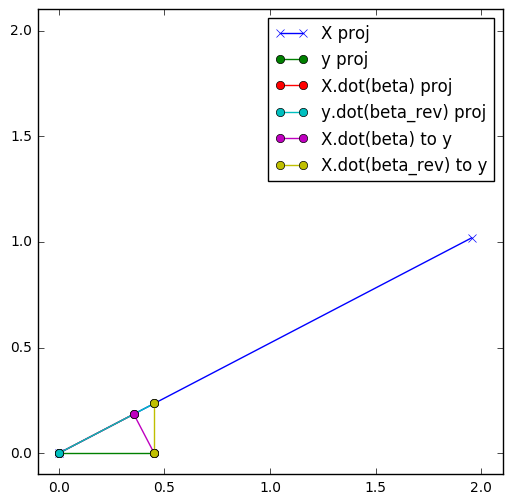

In [27]:
import mylib
import importlib
importlib.reload(mylib)

x0 = X[:, 0]

b0 = y / np.linalg.norm(y)

x0_proj_y = x0.dot(y) / y.dot(y) * y
b1_unnorm = x0 - x0_proj_y
b1 = b1_unnorm / np.linalg.norm(b1_unnorm)

def proj_ortho_basis(v, b0, b1):
    v = v.reshape(-1)
    b0 = b0.reshape(-1)
    b1 = b1.reshape(-1)
    x = v.dot(b0)
    y = v.dot(b1)
    proj = np.array([x, y], dtype=np.float32)
    return proj

X_proj_basis = proj_ortho_basis(X, b0, b1)
y_proj_basis = proj_ortho_basis(y, b0, b1)

X_beta = X.dot(beta)
X_beta_rev = X.dot(beta_rev)

plt.figure(figsize=(6, 6))
mylib.plot_vector(X_proj_basis, formatstr='-x', label='X proj')
mylib.plot_vector(y_proj_basis, formatstr='-o', label='y proj')
mylib.plot_vector(proj_ortho_basis(X_beta, b0, b1), formatstr='-o', label='X.dot(beta) proj')
mylib.plot_vector(proj_ortho_basis(X_beta_rev, b0, b1), formatstr='-o', label='y.dot(beta_rev) proj')
mylib.plot_vector(proj_ortho_basis(X_beta, b0, b1), proj_ortho_basis(y, b0, b1), formatstr='-o', label='X.dot(beta) to y')
mylib.plot_vector(proj_ortho_basis(X_beta_rev, b0, b1), proj_ortho_basis(y, b0, b1), formatstr='-o', label='X.dot(beta_rev) to y')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 2.1)
plt.legend()
plt.show()

Lets try multiple features

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math
import importlib
import mylib
importlib.reload(mylib)
from mylib import plot_vector, zerov


N = 5
K = 2

beta_underlying = np.zeros((K,), dtype=np.float32)
beta_underlying.fill(0.3)
noise = 0.1

np.random.seed(123)
X = np.random.randn(N, K).astype(np.float32)
y = X.dot(beta_underlying) + np.random.randn(N) * noise
print('y', y)

# plt.plot(X.reshape(N), np.zeros(N), 'o')
# plt.plot(X.reshape(N), y, 'o')
# plt.show()

print('X\n', X)
print('y\n', y)

y [-0.09437418 -0.37646578  0.47098986 -0.92056773  0.07536056]
X
 [[-1.08563066  0.99734545]
 [ 0.2829785  -1.50629473]
 [-0.57860023  1.65143657]
 [-2.42667913 -0.42891264]
 [ 1.26593626 -0.86674041]]
y
 [-0.09437418 -0.37646578  0.47098986 -0.92056773  0.07536056]


Now, we have three vectors, all in the same dimensional space as before, ie $N$ dimensions, where here $N$ is 5.

Presumably, we need to project everything into the plane containing the two $\mathbf{X}$ column vectors?

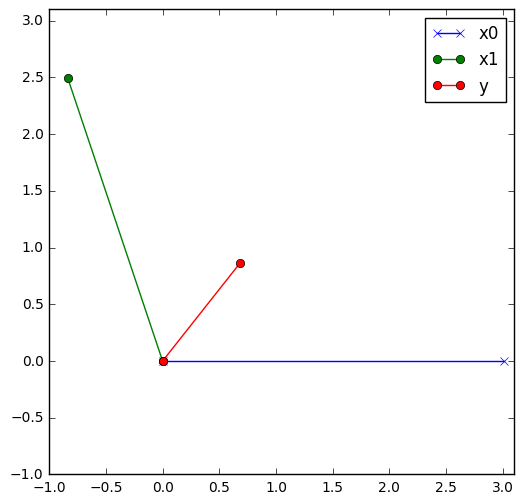

In [42]:
# lets use one of the x vectors as one basis vector, and then use the projection formula,
# using th eother x vector, to find the basis vector

x0 = X[:, 0]
x1 = X[:, 1]

b0 = x0 / np.linalg.norm(x0)
x1_proj_b0 = x1.dot(b0) * b0
b1_unnorm = x1 - x1_proj_b0
b1 = b1_unnorm / np.linalg.norm(b1_unnorm)

def proj_ortho_basis(v, b0, b1):
    v = v.reshape(-1)
    b0 = b0.reshape(-1)
    b1 = b1.reshape(-1)
    x = v.dot(b0)
    y = v.dot(b1)
    proj = np.array([x, y], dtype=np.float32)
    return proj

x0_proj_basis = proj_ortho_basis(x0, b0, b1)
x1_proj_basis = proj_ortho_basis(x1, b0, b1)
y_proj_basis = proj_ortho_basis(y, b0, b1)

plt.figure(figsize=(6, 6))
mylib.plot_vector(x0_proj_basis, formatstr='-x', label='x0')
mylib.plot_vector(x1_proj_basis, formatstr='-o', label='x1')
mylib.plot_vector(y_proj_basis, formatstr='-o', label='y')
plt.xlim(-1, 3.1)
plt.ylim(-1, 3.1)
plt.legend()
plt.show()

In [45]:
# using the formula:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print('beta', beta)

beta [ 0.32176245  0.34527784]


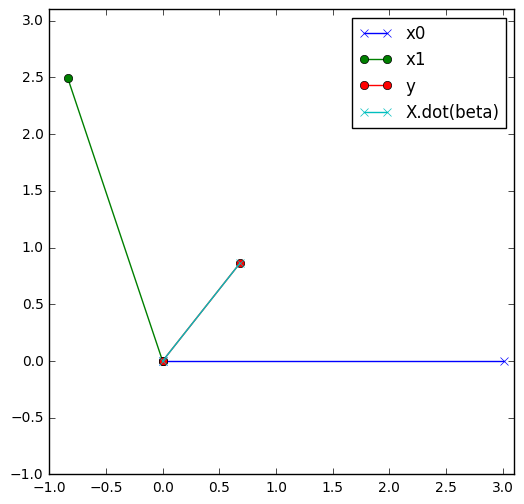

In [47]:
def proj(vec):
    return proj_ortho_basis(vec, b0, b1)

plt.figure(figsize=(6, 6))
mylib.plot_vector(proj(x0), formatstr='-x', label='x0')
mylib.plot_vector(proj(x1), formatstr='-o', label='x1')
mylib.plot_vector(proj(y), formatstr='-o', label='y')
mylib.plot_vector(proj(X.dot(beta)), formatstr='-x', label='X.dot(beta)')
plt.xlim(-1, 3.1)
plt.ylim(-1, 3.1)
plt.legend()
plt.show()

Makes sense I suppose:
    
- the shortest line from $\mathbf{y}$ to the hyperplane formed by $\mathbf{X}_{*,1}$ and $\mathbf{X}_{*,2}$ will be perpendicular to this hyperplane.  Otherwise its not the shortest line.  And therefore it is orthogonal to our projection plane, and therefore exactly coincides with where $\mathbf{y}$ appears, when viewed via the projection above
- in our projection, we can move to any point in the projection plane, using the column vectors of $\mathbf{X}$. We just cant move into or out of the paper/picture/diagram.  Therefore, the shortest line from $\mathbf{y}$ to this plane will exactly correspond to the orthogonal projection of $\mathbf{y}$ onto this plane.